# Graphs

#### Import Libraries

In [2]:
%matplotlib inline

from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Read the dataset

In [40]:
df = pd.read_csv("merged_comp_data.csv")

df = df.fillna(0)

### Information about dataset

In [41]:
# list of values of 'lang' column
languages = df.lang.unique()

# list of values of 'uniform_id' column
participants = df.uniform_id.unique()

# show the lenght of the language list
print(f'There are {len(languages)} languages in dataset')

# show the values of the languages
print(f'The languages in dataset are: {languages}')

# show the lenght of the participant list
print(f'There are {len(participants)} participants in dataset')


There are 12 languages in dataset
The languages in dataset are: ['du' 'gr' 'he' 'it' 'no' 'ee' 'fi' 'ge' 'en' 'ru' 'sp' 'tr']
There are 450 participants in dataset


### Categorize the languages

In [42]:
# create df for du language
du_lang = df[df['lang'] == 'du']

# create df for gr language
gr_lang = df[df['lang'] == 'gr']

# create df for he language
he_lang = df[df['lang'] == 'he']

# create df for it language
it_lang = df[df['lang'] == 'it']

# create df for no language
no_lang = df[df['lang'] == 'no']

# create df for ee language
ee_lang = df[df['lang'] == 'ee']

# create df for fi language
fi_lang = df[df['lang'] == 'fi']

# create df for ge language
ge_lang = df[df['lang'] == 'ge']

# create df for en language
en_lang = df[df['lang'] == 'en']

# create df for ru language
ru_lang = df[df['lang'] == 'ru']

# create df for sp language
sp_lang = df[df['lang'] == 'sp']

# create df for tr language
tr_lang = df[df['lang'] == 'tr']

# create a list of language dfs
lang_list = [du_lang,
             gr_lang,
             he_lang,
             it_lang,
             no_lang,
             ee_lang,
             fi_lang,
             ge_lang,
             en_lang,
             ru_lang,
             sp_lang,
             tr_lang]

# print the list of lang vars
print(f'Total language dataframes: {len(lang_list)}')


Total language dataframes: 12


### Categorize participants per language

In [43]:
for language in lang_list:
    # participant count
    participant_count = language.uniform_id.unique()

    # participant lang
    participant_lang = language.lang.unique()
    
    # show the lenght of the participant list
    print(f'There are {len(participant_count)} participants in {participant_lang} dataset')

There are 44 participants in ['du'] dataset
There are 24 participants in ['gr'] dataset
There are 40 participants in ['he'] dataset
There are 44 participants in ['it'] dataset
There are 28 participants in ['no'] dataset
There are 54 participants in ['ee'] dataset
There are 47 participants in ['fi'] dataset
There are 39 participants in ['ge'] dataset
There are 40 participants in ['en'] dataset
There are 41 participants in ['ru'] dataset
There are 34 participants in ['sp'] dataset
There are 15 participants in ['tr'] dataset


### Categorize PoS per language

In [44]:
for language in lang_list:
    # pos count
    pos_count = language.PoS.unique()
    
    # participant lang
    participant_lang = language.lang.unique()
    
    # show the lenght of the participant list
    print(f'There are {len(pos_count)} PoS in {participant_lang} dataset')


There are 31 PoS in ['du'] dataset
There are 31 PoS in ['gr'] dataset
There are 31 PoS in ['he'] dataset
There are 31 PoS in ['it'] dataset
There are 31 PoS in ['no'] dataset
There are 31 PoS in ['ee'] dataset
There are 31 PoS in ['fi'] dataset
There are 31 PoS in ['ge'] dataset
There are 31 PoS in ['en'] dataset
There are 31 PoS in ['ru'] dataset
There are 31 PoS in ['sp'] dataset
There are 31 PoS in ['tr'] dataset


### Create Pos Data for each language

### Create Language Data for each PoS

{'CC': {'du': 117.02152521525215, 'ee': 118.59337231968811, 'en': 129.1031793641272, 'fi': 92.44884755357864, 'ge': 102.97072660742289, 'gr': 162.54766949152543, 'he': 201.0613810741688, 'it': 137.5723172628305, 'no': 127.67752442996742, 'ru': 134.6036809815951, 'sp': 133.0041180507893, 'tr': 157.80297397769516}, 'CD': {'du': 281.40232558139536, 'ee': 333.90432098765433, 'en': 252.09728506787332, 'fi': 292.3503184713376, 'ge': 368.2383838383838, 'gr': 274.4382978723404, 'he': 356.6442786069652, 'it': 392.11591355599217, 'no': 337.7391304347826, 'ru': 295.553488372093, 'sp': 334.75324675324674, 'tr': 359.8740740740741}, 'DT': {'du': 154.89223560910307, 'ee': 163.63503007187913, 'en': 135.34982332155477, 'fi': 154.0705000764643, 'ge': 190.27938638542665, 'gr': 169.62651072124757, 'he': 224.50306147440608, 'it': 187.9635574018127, 'no': 169.9120425029516, 'ru': 177.01499888068054, 'sp': 167.518855656697, 'tr': 188.87833219412167}, 'EX': {'du': 242.93567251461988, 'ee': 224.11764705882354,

# Graphs

### PoS data per language

In [150]:
language_pos_data = {}
for language in lang_list:
    pos_data = {}
    # pos count
    pos_count = language.PoS.unique()

    # language of dataframe
    participant_lang = language.lang.unique()[0]
    
    # show the lenght of the participant list
    #print(f'There are {len(pos_count)} PoS in {participant_lang} dataset')

    for pos in pos_count:
        # calculate the mean of the duration value for each PoS 
        pos_duration = language.loc[language['PoS'] == pos, 'dur'].mean()

        #print(f' --> Mean value for the {pos} is {pos_duration} in {participant_lang} language')

        # Add the mean value of each PoS to pos_data dictionary 
        pos_data[pos] = pos_duration
    
    # Add language data to dictionary
    language_pos_data[participant_lang] = dict(sorted(pos_data.items()))

# for language in language_pos_data:
#     fig, ax = plt.subplots()
#     fruits = list(language_pos_data[language].keys())
#     counts = list(language_pos_data[language].values())
#     bar_labels = list(language_pos_data[language].keys())
#     ax.bar(fruits, counts, label=bar_labels)
#     ax.set_ylabel('duration')
#     ax.set_title(f'Mean of durations per PoS value in {language} language')
#     fig.autofmt_xdate()
#     fig.set_size_inches(14,6)
#     plt.show()

### TR vs HE

In [178]:
# tr_he_y = list(language_pos_data['tr'].keys())
# tr_he_data = {
#     'tr': list(language_pos_data['tr'].values()),
#     'he': list(language_pos_data['he'].values()),
# }

# x = np.arange(len(tr_he_y))
# width = 0.3  # the width of the bars
# multiplier = 0

# fig, ax = plt.subplots(layout='constrained')
# fig.set_size_inches(20,8)

# for pos, value in tr_he_data.items():
#     offset = width * multiplier
#     rects = ax.bar(x + offset, value, width, label=pos)
#     multiplier += 1

# ax.set_ylabel('duration')
# ax.set_title('TR vs HE')
# ax.set_xticks(x + width, tr_he_y)
# ax.legend(loc='upper left', ncols=2)


# plt.show()

### Language data per PoS

In [151]:
pos_data_per_language = {}
pos_count_var =  list(language_pos_data['du'].keys())
for pos in pos_count_var:
    language_data = {}
    for language in lang_list:
        participant_lang = language.lang.unique()[0]
        pos_duration = language.loc[language['PoS'] == pos, 'dur'].mean()
        language_data[participant_lang] = pos_duration
    pos_data_per_language[pos] = dict(sorted(language_data.items()))

# for pos in pos_data_per_language:
#     fig, ax = plt.subplots()
#     fruits = list(pos_data_per_language[pos].keys())
#     counts = list(pos_data_per_language[pos].values())
#     bar_labels = list(pos_data_per_language[pos].keys())
#     ax.bar(fruits, counts, label=bar_labels)
#     ax.set_ylabel('duration')
#     ax.set_title(f'Mean of durations of {pos} in all languages')
#     fig.autofmt_xdate()
#     fig.set_size_inches(14,6)
#     plt.show()



### Germanic Languages

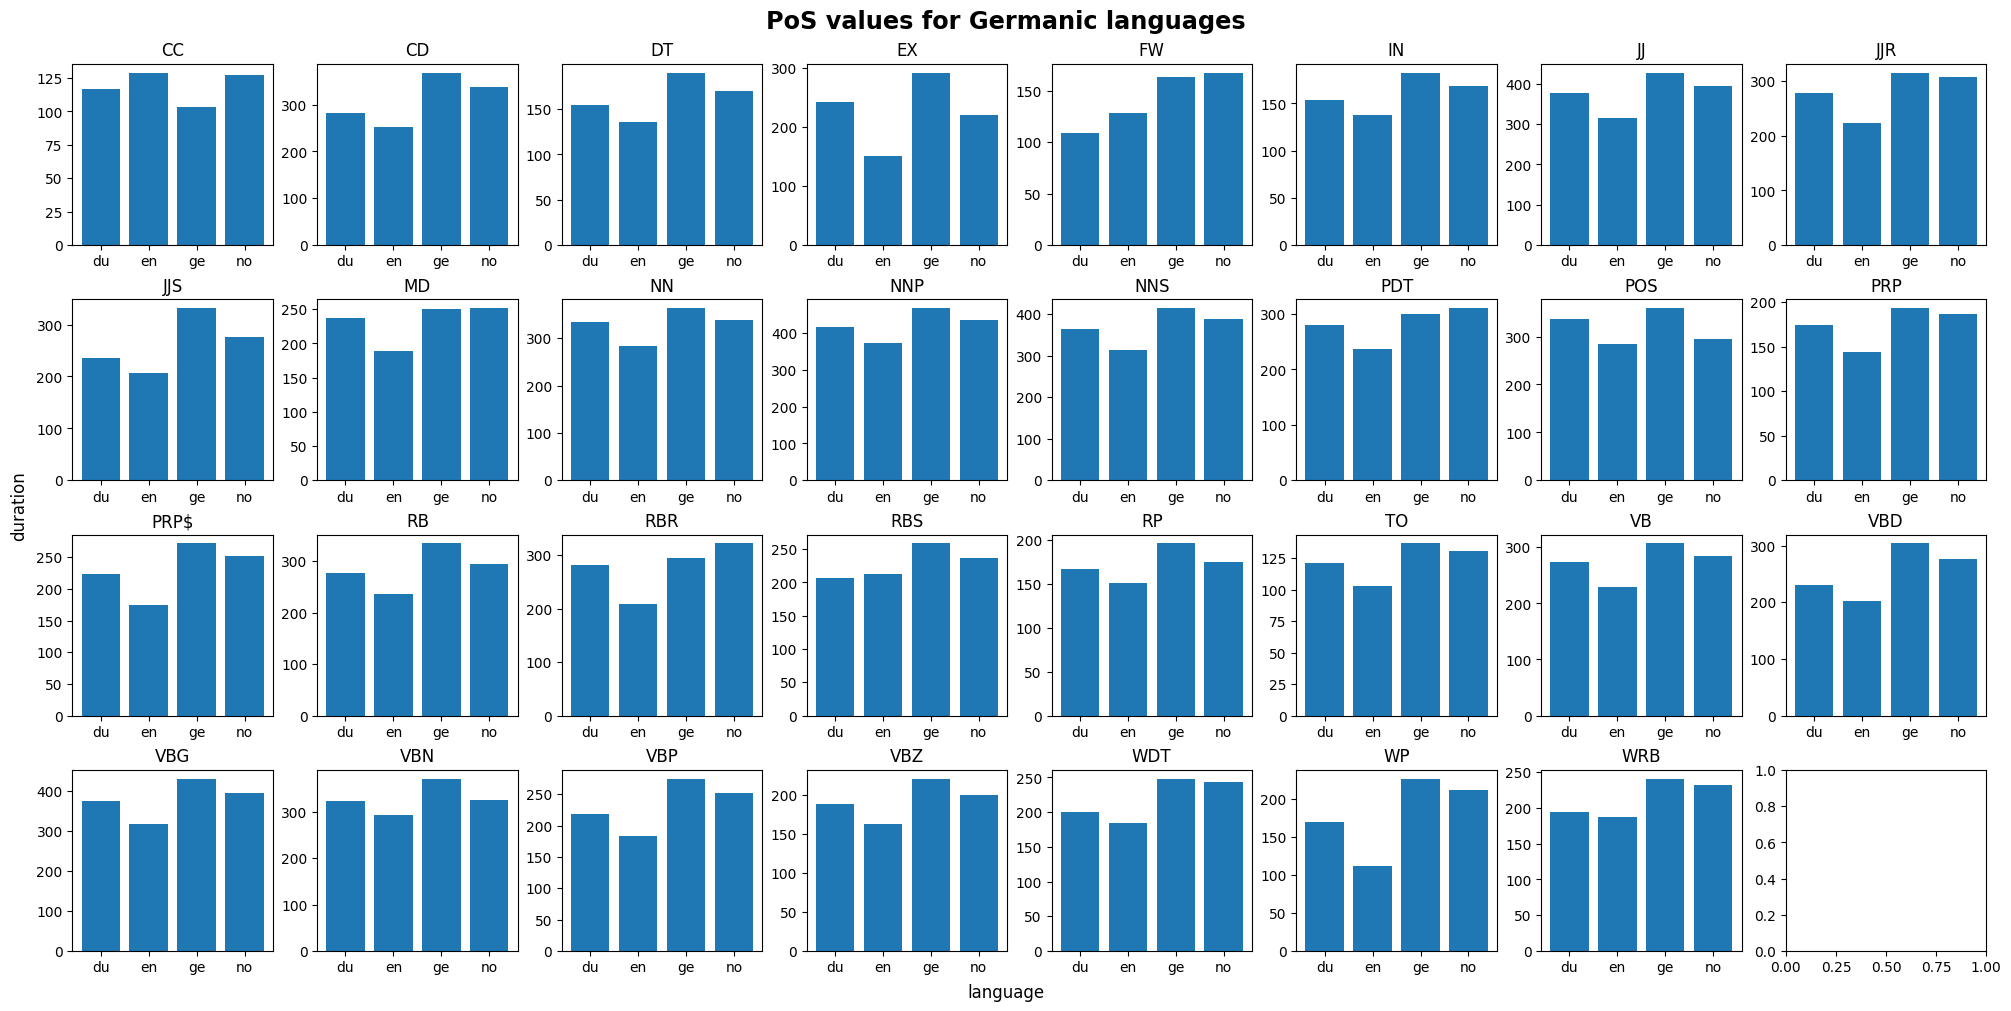

In [175]:
pos_data_germanic_language = {}
pos_count_var =  list(language_pos_data['du'].keys())

germanic_languages = ['du','en','ge','no']
for pos in pos_count_var:
    language_data = {}
    for language in lang_list:
        participant_lang = language.lang.unique()[0]
        if participant_lang in germanic_languages:
            pos_duration = language.loc[language['PoS'] == pos, 'dur'].mean()
            language_data[participant_lang] = pos_duration
    pos_data_germanic_language[pos] = dict(sorted(language_data.items()))

cases =  list(language_pos_data['du'].keys())
fig, axs = plt.subplots(4, 8, figsize=(20, 10), layout='constrained')

fig.suptitle('PoS values for Germanic languages', fontsize = 'xx-large', weight = 'extra bold')
fig.supxlabel('language')
fig.supylabel('duration')

for ax, pos in zip(axs.flat, cases):
    ax.set_title(pos)
    ax.bar(list(pos_data_germanic_language[pos].keys()),list(pos_data_germanic_language[pos].values()))



### Uralic Languages

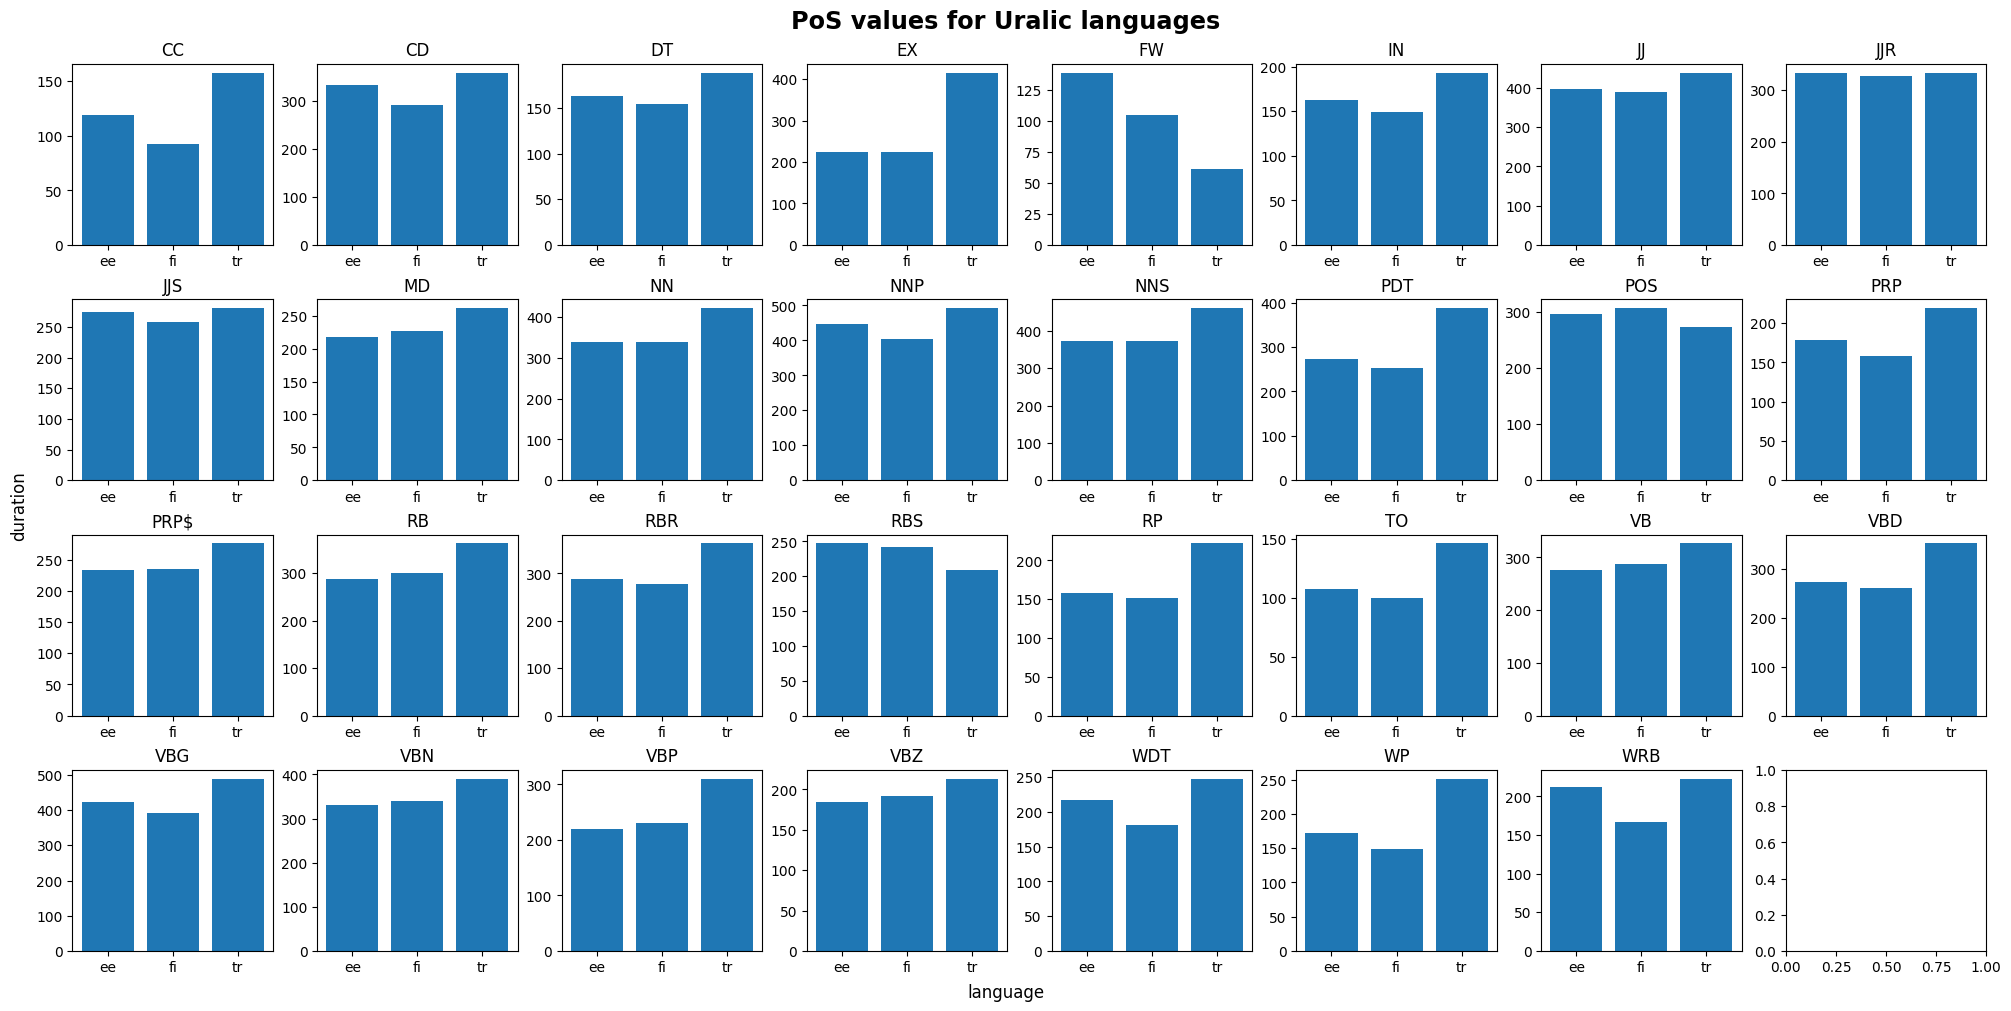

In [174]:
pos_data_uralic_language = {}
pos_count_var =  list(language_pos_data['tr'].keys())

uralic_languages = ['fi','ee','tr']
for pos in pos_count_var:
    language_data = {}
    for language in lang_list:
        participant_lang = language.lang.unique()[0]
        if participant_lang in uralic_languages:
            pos_duration = language.loc[language['PoS'] == pos, 'dur'].mean()
            language_data[participant_lang] = pos_duration
    pos_data_uralic_language[pos] = dict(sorted(language_data.items()))

cases =  list(language_pos_data['du'].keys())
fig, axs = plt.subplots(4, 8, figsize=(20, 10), layout='constrained')

fig.suptitle('PoS values for Uralic languages', fontsize = 'xx-large', weight = 'extra bold')
fig.supxlabel('language')
fig.supylabel('duration')

for ax, pos in zip(axs.flat, cases):
    ax.set_title(pos)
    ax.bar(list(pos_data_uralic_language[pos].keys()),list(pos_data_uralic_language[pos].values()))



### Romance Languages

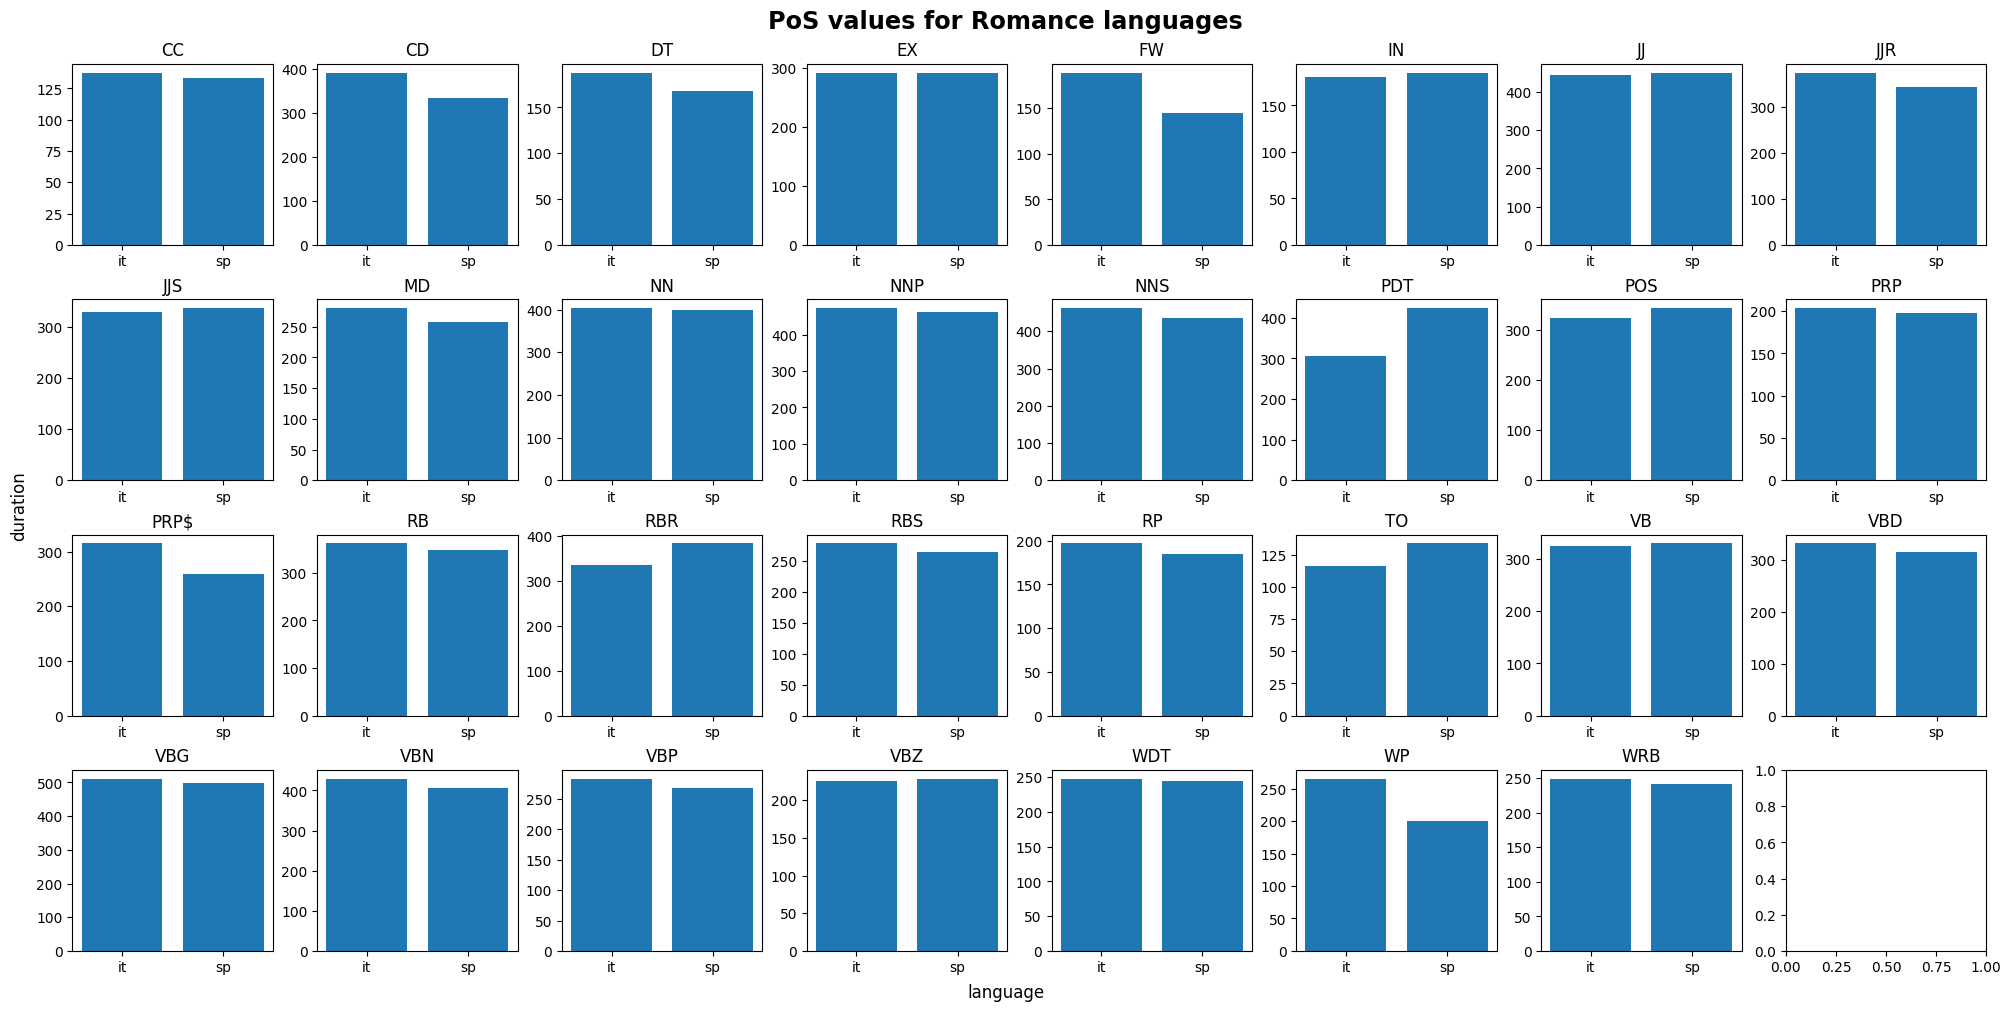

In [176]:
pos_data_romance_language = {}
pos_count_var =  list(language_pos_data['tr'].keys())

romance_languages = ['it','sp']
for pos in pos_count_var:
    language_data = {}
    for language in lang_list:
        participant_lang = language.lang.unique()[0]
        if participant_lang in romance_languages:
            pos_duration = language.loc[language['PoS'] == pos, 'dur'].mean()
            language_data[participant_lang] = pos_duration
    pos_data_romance_language[pos] = dict(sorted(language_data.items()))

cases =  list(language_pos_data['du'].keys())
fig, axs = plt.subplots(4, 8, figsize=(20, 10), layout='constrained')

fig.suptitle('PoS values for Romance languages', fontsize = 'xx-large', weight = 'extra bold')
fig.supxlabel('language')
fig.supylabel('duration')

for ax, pos in zip(axs.flat, cases):
    ax.set_title(pos)
    ax.bar(list(pos_data_romance_language[pos].keys()),list(pos_data_romance_language[pos].values()))

### Different Writing System than Latin

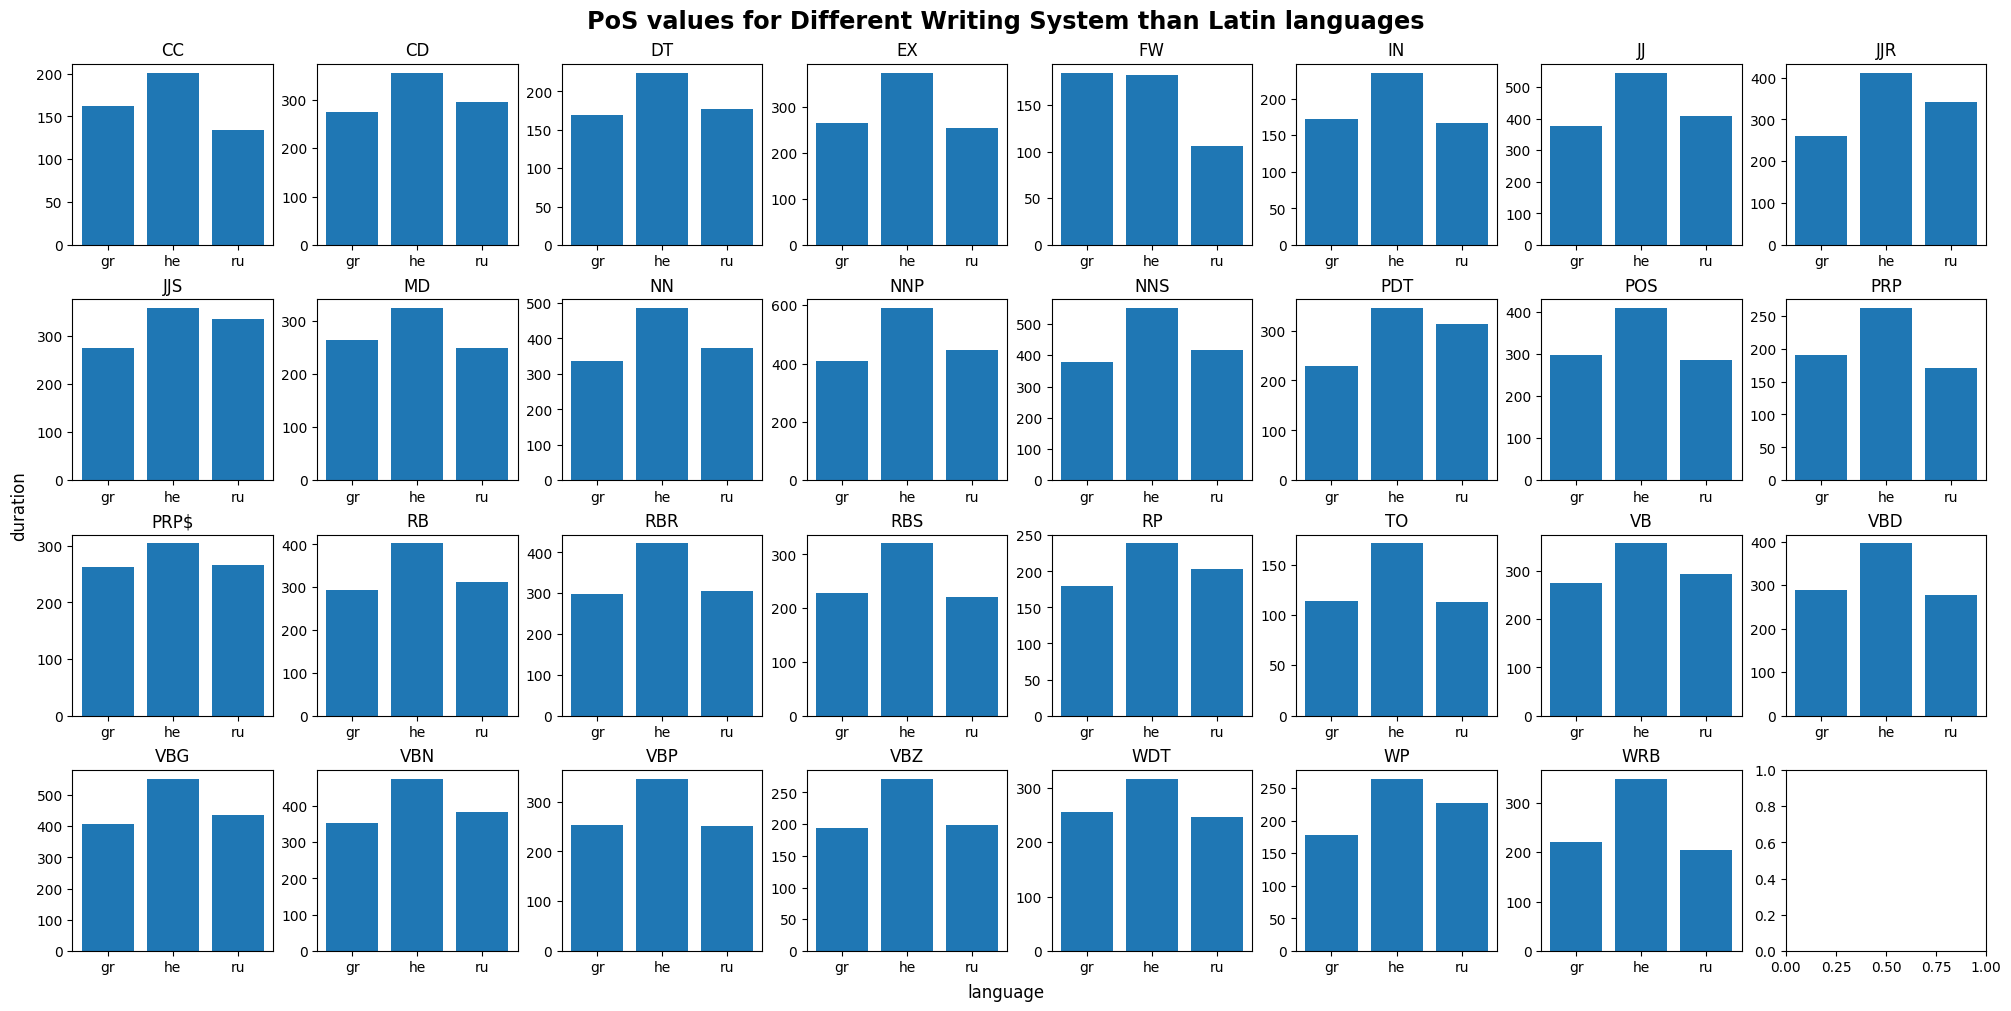

In [177]:
pos_data_diff_language = {}
pos_count_var =  list(language_pos_data['he'].keys())

diff_languages = ['he','gr','ru']
for pos in pos_count_var:
    language_data = {}
    for language in lang_list:
        participant_lang = language.lang.unique()[0]
        if participant_lang in diff_languages:
            pos_duration = language.loc[language['PoS'] == pos, 'dur'].mean()
            language_data[participant_lang] = pos_duration
    pos_data_diff_language[pos] = dict(sorted(language_data.items()))

cases =  list(language_pos_data['du'].keys())
fig, axs = plt.subplots(4, 8, figsize=(20, 10), layout='constrained')

fig.suptitle('PoS values for Different Writing System than Latin languages', fontsize = 'xx-large', weight = 'extra bold')
fig.supxlabel('language')
fig.supylabel('duration')

for ax, pos in zip(axs.flat, cases):
    ax.set_title(pos)
    ax.bar(list(pos_data_diff_language[pos].keys()),list(pos_data_diff_language[pos].values()))